In [31]:
# Importing other Libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Importing our Library
from DS_toolbox.data.cleaning.nan_manager import * 
from DS_toolbox.data.cleaning.outliers_processor import * 
from DS_toolbox.data.creation.interaction import * 
from DS_toolbox.data.preparation.standardization import * 
from DS_toolbox.data.transformation.categorical import * 
from DS_toolbox.data.transformation.numerical import * 
from DS_toolbox.data.visualization.correlation import * 
from DS_toolbox.data.visualization.distribution import * 
from DS_toolbox.data.visualization.outliers import * 
from DS_toolbox.model.evaluation.general import * 
from DS_toolbox.model.optimization.CV import * 
from DS_toolbox.model.optimization.hyperparameters import * 
from DS_toolbox.model.visualization.features import * 
from DS_toolbox.model.visualization.classification import * 

In [2]:
df = pd.read_csv('/Users/lluisarull/Desktop/DSDM/Computing_for_Data_Science/Final_Project/healthcare-dataset-stroke-data.csv', sep= ",", decimal=".")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Preprocessors

In [4]:
#Dropping NaNs from column bmi:
df_cleaned = clearNA_from_column(df,['bmi'])
df_cleaned

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [7]:
# Removing outliers
df_cleanedwo = check_outliers_std_dev(df_cleaned, ['id','gender','hypertension','heart_disease',
 'ever_married','work_type','Residence_type','smoking_status','stroke'])[1]
df_cleanedwo

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Features Construction

ONE HOT ENCODING

In [8]:
df1 = OneHotEncoding(df_cleanedwo, ['work_type','smoking_status'])
df1

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
2,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
3,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
4,56669,Male,81.0,0,0,Yes,Urban,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,Rural,103.08,18.6,0,0,0,0,0,1,1,0,0,0
4905,44873,Female,81.0,0,0,Yes,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
4906,19723,Female,35.0,0,0,Yes,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
4907,37544,Male,51.0,0,0,Yes,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


BINARY VARIABLES

In [9]:
df2 = binary_var(df1, 'gender', labels=["Male","Female"])
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,Yes,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,31112,1,80.0,0,1,Yes,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
2,60182,0,49.0,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
3,1665,0,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
4,56669,1,81.0,0,0,Yes,Urban,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,13.0,0,0,No,Rural,103.08,18.6,0,0,0,0,0,1,1,0,0,0
4905,44873,0,81.0,0,0,Yes,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
4906,19723,0,35.0,0,0,Yes,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
4907,37544,1,51.0,0,0,Yes,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [10]:
df2 = binary_var(df2, 'ever_married', labels=['Yes','No'])
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,31112,1,80.0,0,1,1,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
2,60182,0,49.0,0,0,1,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
3,1665,0,79.0,1,0,1,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
4,56669,1,81.0,0,0,1,Urban,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,13.0,0,0,0,Rural,103.08,18.6,0,0,0,0,0,1,1,0,0,0
4905,44873,0,81.0,0,0,1,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
4906,19723,0,35.0,0,0,1,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
4907,37544,1,51.0,0,0,1,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [11]:
df2 = binary_var(df2, 'Residence_type', labels=['Urban','Rural'])
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
2,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
3,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
4,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
4905,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
4906,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
4907,37544,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


LOG TRANSFORMATION

In [12]:
df3 = log_transformation(df2, ['age','avg_glucose_level','bmi'])
df3

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,4.204693,0,1,1,1,5.432367,3.600048,1,0,0,1,0,0,0,1,0,0
1,31112,1,4.382027,0,1,1,0,4.662684,3.481240,1,0,0,1,0,0,0,0,1,0
2,60182,0,3.891820,0,0,1,1,5.143008,3.538057,1,0,0,1,0,0,0,0,0,1
3,1665,0,4.369448,1,0,1,0,5.159745,3.178054,1,0,0,0,1,0,0,0,1,0
4,56669,1,4.394449,0,0,1,1,5.226875,3.367296,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,2.564949,0,0,0,0,4.635505,2.923162,0,0,0,0,0,1,1,0,0,0
4905,44873,0,4.394449,0,0,1,1,4.829912,3.688879,0,0,0,0,1,0,0,0,1,0
4906,19723,0,3.555348,0,0,1,0,4.418720,3.421000,0,0,0,0,1,0,0,0,1,0
4907,37544,1,3.931826,0,0,1,0,5.113733,3.242592,0,0,0,1,0,0,0,1,0,0


In [13]:
df3 = careful_standardization(df3, ['id','gender','hypertension','heart_disease',	'ever_married','Residence_type', 'stroke','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes'])
df3

,age,avg_glucose_level,bmi,work_type_Govt_job,smoking_status_Unknown,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.766359,2.509343,1.108963,-0.383354,-0.663579,9046,1,0,1,1,1,1,0,1,0,0,1,0,0
1,0.954036,0.260407,0.641449,-0.383354,-0.663579,31112,1,0,1,1,0,1,0,1,0,0,0,1,0
2,0.435238,1.663864,0.865024,-0.383354,-0.663579,60182,0,0,0,1,1,1,0,1,0,0,0,0,1
3,0.940724,1.712768,-0.551596,-0.383354,-0.663579,1665,0,1,0,1,0,1,0,0,1,0,0,1,0
4,0.967183,1.908916,0.193076,-0.383354,-0.663579,56669,1,0,0,1,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,-0.969023,0.180994,-1.554604,-0.383354,1.506980,14180,0,0,0,0,0,0,0,0,0,1,0,0,0
4905,0.967183,0.749031,1.458516,-0.383354,-0.663579,44873,0,0,0,1,1,0,0,0,1,0,0,1,0
4906,0.079141,-0.452431,0.404403,-0.383354,-0.663579,19723,0,0,0,1,0,0,0,0,1,0,0,1,0
4907,0.477577,1.578327,-0.297636,-0.383354,-0.663579,37544,1,0,0,1,0,0,0,1,0,0,1,0,0


MODEL

In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier()

In [15]:
#Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1500, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

features = ['gender','avg_glucose_level', 'bmi','age','hypertension','heart_disease','ever_married','Residence_type',
            'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children',
            'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
target = 'stroke'
X = df3[features]
y = df3[target]

optmizied_model, best_params = tuning(forest_class, random_grid, 'f1', X, y)

Best Estimator:  RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=1333)
Optimized Hyperparameters:  {'n_estimators': 1333, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, \
                                precision_score, recall_score

In [17]:
#Building KFold object
SEED = 1
kf = KFold(n_splits = 5, shuffle=True, random_state= SEED)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4908
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4792 non-null   int64  
 1   avg_glucose_level               4792 non-null   float64
 2   bmi                             4792 non-null   float64
 3   age                             4792 non-null   float64
 4   hypertension                    4792 non-null   int64  
 5   heart_disease                   4792 non-null   int64  
 6   ever_married                    4792 non-null   int64  
 7   Residence_type                  4792 non-null   int64  
 8   work_type_Never_worked          4792 non-null   uint8  
 9   work_type_Private               4792 non-null   uint8  
 10  work_type_Self-employed         4792 non-null   uint8  
 11  work_type_children              4792 non-null   uint8  
 12  smoking_status_formerly smoked  47

In [19]:
final_model, final_X_test, final_y_test, final_y_pred, f1_mean = CV_model(X , y, kf, optmizied_model, accuracy_score, the_greater_the_better = True)

3833
3833
3834
3834
3834


# Evaluation and visualization

In [25]:
metrics_dict = {
    "accuracy": accuracy_score,
    "f1": f1_score,
    "precision": precision_score,
    "recall": recall_score
}
evaluate_on_metrics(final_y_pred, final_y_test, metrics_dict)

{'accuracy': 0.9665970772442589, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

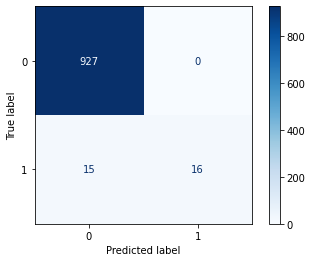

In [26]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, final_X_test, final_y_test, cmap = plt.cm.Blues, values_format='.0f')

In [29]:
import plotly.express as px

fig = px.pie(df3, values='stroke', title='Distribution of Marital Status')
fig.update_layout(
    legend_title = 'Marital Status Categories',
    title_font = dict(family='timesnewroman', size=25, color='black'),
    title_x=0.5,
    font_family="timesnewroman",
    font_color="black",
    legend_title_font_color="black"
   )
fig.show()

In [33]:
fig1, ax1 = plt.subplots()
sizes = [np.sum(df3[target]), len(y)- np.sum(df3[target])]
labels = ["stroke", "not stroke"]
ax1.pie(sizes, labels = labels, autopct="%1.1f%%",
    shadow = True, startangle=90)
ax1.axis("equal")
plt.show()


AttributeError: module 'matplotlib' has no attribute 'subplot'